In [1]:
import numpy as np
import matplotlib.pyplot as plt
from geneticalgorithm import geneticalgorithm as ga
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

import mesh
import geometry
import material
from stress_strain_analysis import stress_strain_analysis

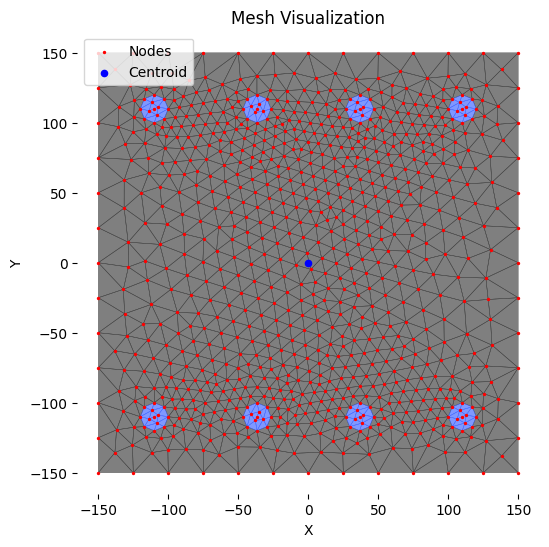

In [2]:
ReinforcedConcrete = geometry.ReinforcedConcreteColumn(width  = 300, 
                                                       height = 300, 
                                                       concrete_cover = 30,
                                                       rebar_diameter = 20,
                                                       rebar_spacing  = 50)
Mesh = mesh.Mesh(ReinforcedConcrete, "triangle", 25)
Mesh.plot()

In [3]:
Analysis = stress_strain_analysis(Mesh, Nx=0, My=100)

 The best solution found:                                                                           
 [-6.80423302e-04  1.05203931e-05]

 Objective function:
 8.761941729729081


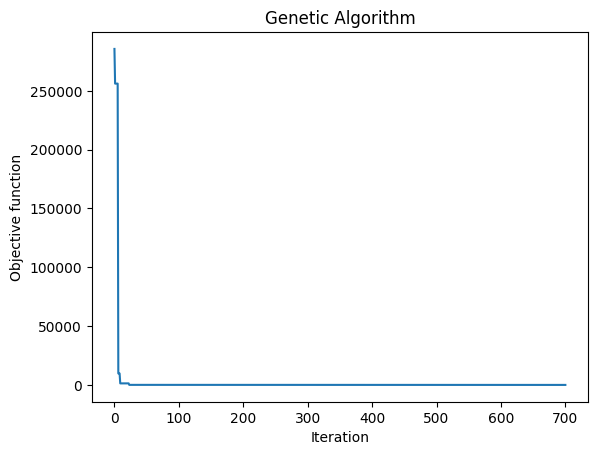

Nx =  -0.2324700952280109 kN
My =  97.04908499198066 kNm


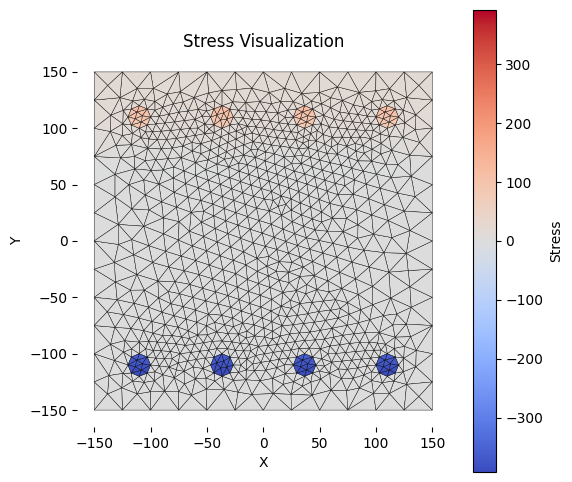

In [4]:
varbound=np.array([[- 0.001,  0.001],
                   [-0.0001, 0.0001]])

algorithm_param = {'max_num_iteration': 700,\
                   'population_size':40,\
                   'mutation_probability':0.5,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.1,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=ga(function=Analysis.find_strain_and_curvature,
         dimension=2,
         variable_type='real',
         variable_boundaries=varbound,
         algorithm_parameters=algorithm_param)

model.run()

eps, xsi = model.best_variable
Analysis.set_strain_and_curvature(eps, xsi)
Analysis.calculate_strains()
Analysis.calculate_stresses()
print("Nx = ", Analysis.get_section_forces()[0], "kN")
print("My = ", Analysis.get_section_forces()[1], "kNm")
Analysis.plot_stresses()